# Contributions Analysis of SHAP

In [1]:
%pwd

'/mnt/d/OneDrive - Kyushu University/ESG09_Article/Code'

In [2]:
%cd ..

/mnt/d/OneDrive - Kyushu University/ESG09_Article


## Import Package

In [160]:
import geopandas as gpd
from joblib import dump, load
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import os 
import pandas as pd
from scipy import stats
import seaborn as sns
from shapely.ops import unary_union

## Contribution Analysis

### Load Data

In [4]:
Shap_df = load("Results/Shap_GenderAbsTreamentDifference.joblib")

In [5]:
Concat_Shap = pd.concat(Shap_df, axis=0)

Concat_Shap.to_parquet("Results/Shap_GenderAbsTreamentDifference.parquet")

Concat_Shap = pd.read_parquet("Results/Shap_GenderAbsTreamentDifference.parquet")

In [6]:
colnames = Concat_Shap.columns

In [7]:
Concat_Shap.shape

(191122, 451)

### Visual the Top 10 Variables

In [8]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' not in item]

In [9]:
len(shap_colnames)

61

In [10]:
Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).head(20)

INCOME_2_shap                  0.009974
Enough_food_shap               0.003915
Marital_status_shap            0.003844
Enjoyment_shap                 0.003768
Age_shap                       0.003718
Living_standard_change_shap    0.002816
wave_shap                      0.002618
Children_respected_shap        0.002561
Income_level_shap              0.002308
Corruption_business_shap       0.002188
Conf_military_shap             0.001867
Voice_official_shap            0.001610
Freedom_chooselife_shap        0.001585
Employment_shap                0.001544
Anger_shap                     0.001379
Sat_oppofriend_shap            0.001315
Feeling_income_shap            0.001247
Safety_walk_shap               0.001191
Stolen_shap                    0.001051
Enough_shelter_shap            0.001007
dtype: float32

In [11]:
for item in Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index:
    print(item)

INCOME_2_shap
Enough_food_shap
Marital_status_shap
Enjoyment_shap
Age_shap
Living_standard_change_shap
wave_shap
Children_respected_shap
Income_level_shap
Corruption_business_shap
Conf_military_shap
Voice_official_shap
Freedom_chooselife_shap
Employment_shap
Anger_shap
Sat_oppofriend_shap
Feeling_income_shap
Safety_walk_shap
Stolen_shap
Enough_shelter_shap
Sadness_shap
Good_minorities_shap
Stress_shap
Children_under15_shap
Well_rested_shap
Sat_qualitywater_shap
Conf_government_shap
Sat_perserveenv_shap
Sat_healthcare_shap
Assualted_shap
Corruption_government_shap
Smile_shap
Good_gayles_shap
Health_disable_shap
Local_police_shap
Help_stranger_shap
Conf_honestyelections_shap
City_satisficied_shap
Sat_dealpoor_shap
Sat_road_shap
Sat_qualityair_shap
Good_immigrants_shap
Volunteer_shap
Sat_affhouse_shap
Sat_pubtran_shap
Interesting_thing_shap
Goodtime_job_shap
Children_learn_shap
Physical_pain_shap
Relative_have_shap
Donated_shap
Economic_change_shap
Conf_financial_shap
Conf_judicial_shap
W

In [12]:
top = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:30]

In [13]:
means = Concat_Shap[shap_colnames].mean(axis=0)

In [14]:
std_errors = Concat_Shap[shap_colnames].sem(axis=0)

In [15]:
shap_colnames

['wave_shap',
 'INCOME_2_shap',
 'Health_disable_shap',
 'Relative_have_shap',
 'Living_standard_change_shap',
 'Enough_food_shap',
 'Enough_shelter_shap',
 'Well_rested_shap',
 'Respected_shap',
 'Smile_shap',
 'Interesting_thing_shap',
 'Enjoyment_shap',
 'Physical_pain_shap',
 'Worry_shap',
 'Sadness_shap',
 'Stress_shap',
 'Anger_shap',
 'City_satisficied_shap',
 'Economic_change_shap',
 'Goodtime_job_shap',
 'Sat_pubtran_shap',
 'Sat_road_shap',
 'Sat_edu_shap',
 'Sat_qualityair_shap',
 'Sat_qualitywater_shap',
 'Sat_healthcare_shap',
 'Sat_affhouse_shap',
 'Sat_oppofriend_shap',
 'Good_minorities_shap',
 'Good_gayles_shap',
 'Good_immigrants_shap',
 'Donated_shap',
 'Volunteer_shap',
 'Help_stranger_shap',
 'Voice_official_shap',
 'Local_police_shap',
 'Safety_walk_shap',
 'Stolen_shap',
 'Assualted_shap',
 'Religion_importance_shap',
 'Children_respected_shap',
 'Children_learn_shap',
 'Women_respected_shap',
 'Sat_dealpoor_shap',
 'Sat_perserveenv_shap',
 'Freedom_chooselife_sh

In [16]:
columns_of_interest = ["Wave", "Household Income", "Health Disability Dummy", "Having Relatives to Rely on Dummy",
                       "Living Standard Changing Direction", "Having Enough Food Dummy", "Having Enough Shelter Dummy", 
                       "Feeling Well Rested Dummy", "Feeling Respected Dummy", "Smiling Dummy",
                       "Doing Interesting Things Dummy", "Having Enjoyment Dummy", "Suffering Physical Pain Dummy",
                       "Feeling Worry Dummy", "Feeling Sad Dummy", "Feeling Stress Dummy", "Feeling Anger Dummy",
                       "Feeling Satisfied with City Dummy", "Economic Changing Direction", "Thinking Good Time to Find Job Dummy",
                       "Feeling Satisfied with Public Transportation Dummy", "Feeling Satisfied with Road Dummy", "Feeling Satisfied with Education Dummy",
                       "Feeling Satisfied with Air Quality Dummy", "Feeling Satisfied with Water Quality Dummy", "Feeling Satisfied with Healthcare Dummy", 
                       "Feeling Satisfied with Affordable House Dummy", "Feeling Satisfied with Opportunity to Make Friends Dummy",
                       "Thinking Good Place for Ethitical Minority Dummy", "Thinking Good Place for Gay or Lesbian Dummy", "Thinking Good Place for Immigrants Dummy",
                       "Donated Recently Dummy", "Did Volunteer Recently Dummy", "Helped Stranger Dummy",
                       "Voiced Opinion to Official Dummy", "Feeling Confident in Local Police Dummy", "Feeling Safe of Alone Night Walking Dummy",
                       "Having Been Stolen Dummy", "Having Been Assaulted Dummy", "Thinking Religion Importance Locally Dummy",
                       "Thinking Children Respected Locally Dummy", "Having Opportunity for Children Learning Locally Dummy", "Feeling Women Respected Dummy",
                       "Feeling Satisfied with Poverty Alleviation Dummy", "Feeling Satisfied with Environmental Efforts Dummy", "Feeling Freedom of Choosing Life Dummy",
                       "Feeling Confidence in Military Dummy", "Feeling Confidence in Judicial System Dummy", "Feeling Confidence in National Government Dummy",
                       "Feeling Confidence in Financial System Dummy", "Feeling Confidence in Election Honesty Dummy", "Feeling Freedom of Media Dummy",
                       "Prevailing Corruption within Business Dummy", "Prevailing Corruption within Government Dummy", "Approving of Leadership Performance Dummy",
                       "Age", "Marital Status", "Employment", 
                       "Children Under 15 Dummy", "Feeling of Income", "Income Level"]

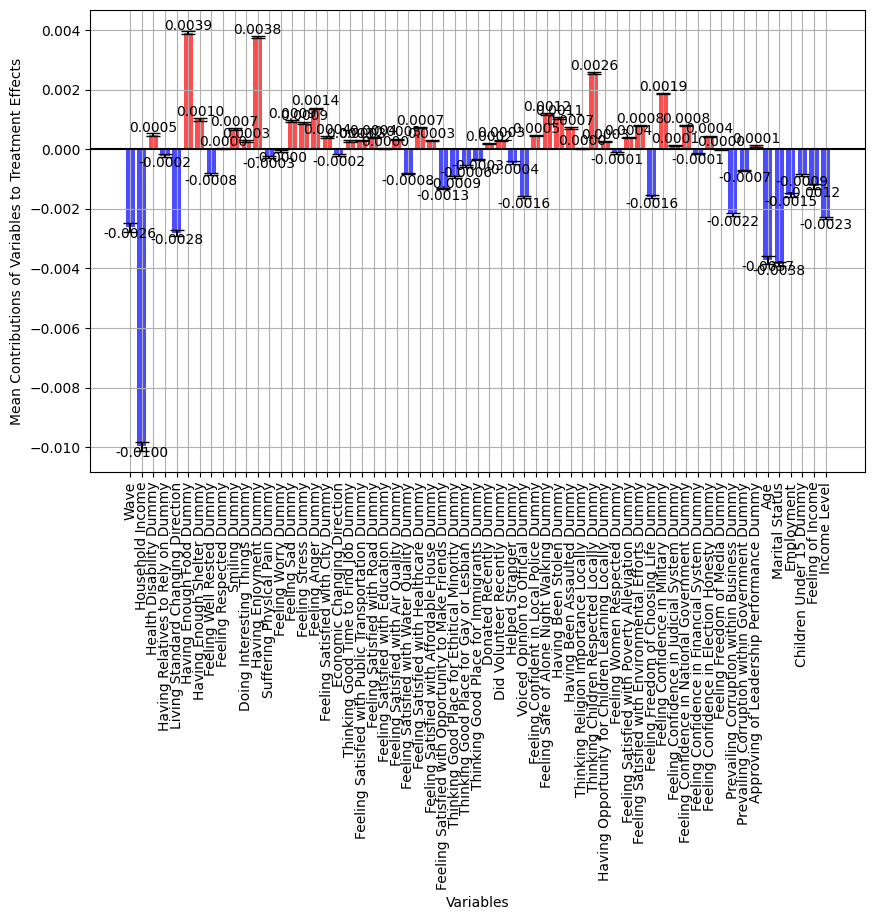

In [17]:
colors = ['red' if value > 0 else 'blue' for value in means]

plt.figure(figsize=(10, 6))
bars = plt.bar(x=columns_of_interest, height=means, yerr=std_errors, capsize=5, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Adding labels and title
plt.xlabel('Variables')
plt.ylabel('Mean Contributions of Variables to Treatment Effects')
plt.xticks(rotation=90)
plt.grid()

plt.savefig('Figures/MJ_ShapAbsTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [18]:
means

wave_shap                     -0.002618
INCOME_2_shap                 -0.009974
Health_disable_shap            0.000492
Relative_have_shap            -0.000209
Living_standard_change_shap   -0.002816
                                 ...   
Marital_status_shap           -0.003844
Employment_shap               -0.001544
Children_under15_shap         -0.000873
Feeling_income_shap           -0.001247
Income_level_shap             -0.002308
Length: 61, dtype: float32

In [19]:
std_errors

wave_shap                      0.000143
INCOME_2_shap                  0.000154
Health_disable_shap            0.000040
Relative_have_shap             0.000060
Living_standard_change_shap    0.000095
                                 ...   
Marital_status_shap            0.000068
Employment_shap                0.000069
Children_under15_shap          0.000029
Feeling_income_shap            0.000099
Income_level_shap              0.000036
Length: 61, dtype: float32

In [20]:
lower_boundary = means - 1.96 * std_errors
upper_boundary = means + 1.96 * std_errors

In [21]:
df_shap_summary = pd.DataFrame({
    'Mean SHAP': means,
    'Lower Boundary 95% CI': lower_boundary,
    'Upper Boundary 95% CI': upper_boundary
})

In [22]:
df_shap_summary.index = columns_of_interest

In [23]:
df_shap_summary.head()

,Mean SHAP,Lower Boundary 95% CI,Upper Boundary 95% CI
Wave,-0.002618,-0.002897,-0.002338
Household Income,-0.009974,-0.010275,-0.009673
Health Disability Dummy,0.000492,0.000413,0.000570
Having Relatives to Rely on Dummy,-0.000209,-0.000327,-0.000091
Living Standard Changing Direction,-0.002816,-0.003003,-0.002629


In [24]:
df_shap_summary = df_shap_summary * 1000

In [25]:
df_shap_summary.head()

,Mean SHAP,Lower Boundary 95% CI,Upper Boundary 95% CI
Wave,-2.617784,-2.897475,-2.338093
Household Income,-9.974160,-10.275290,-9.673031
Health Disability Dummy,0.491826,0.413232,0.570420
Having Relatives to Rely on Dummy,-0.209007,-0.326952,-0.091062
Living Standard Changing Direction,-2.815975,-3.002569,-2.629381


In [26]:
df_shap_summary.sort_values(by='Mean SHAP', key=lambda x: x.abs(), ascending=False).to_excel('Results/MJ_AbsShapResult.xlsx')

PermissionError: [Errno 13] Permission denied: 'Results/MJ_AbsShapResult.xlsx'

### Income and its SHAP Values

In [27]:
Concat_Shap['INCOME_2'].describe()

count    1.911220e+05
mean     2.433664e+04
std      8.170754e+04
min      0.000000e+00
25%      4.205930e+03
50%      1.055181e+04
75%      2.614364e+04
max      9.682815e+06
Name: INCOME_2, dtype: float64

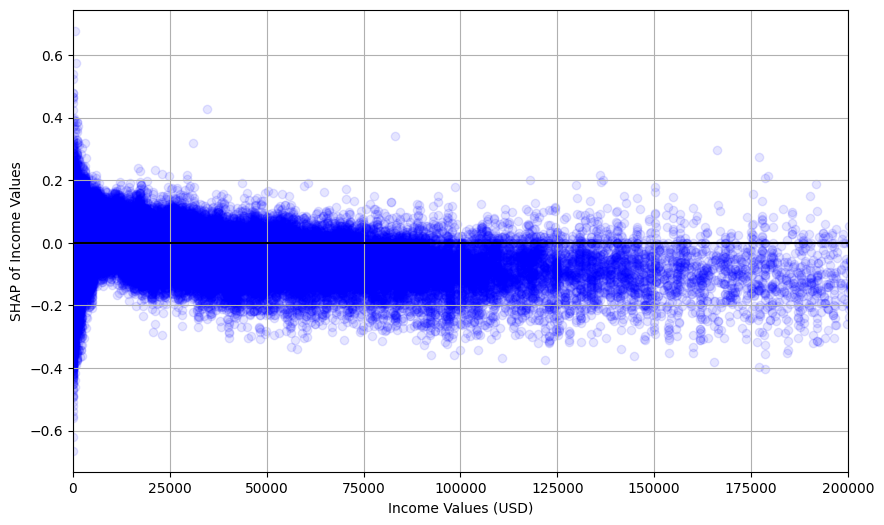

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(Concat_Shap['INCOME_2'], Concat_Shap['INCOME_2_shap'], alpha=0.1, color='blue')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

plt.xlim([0, 200_000])

# Adding labels and title
plt.xlabel('Income Values (USD)')
plt.ylabel('SHAP of Income Values')
plt.grid()

# Show the plot
plt.show()

### Enough Food

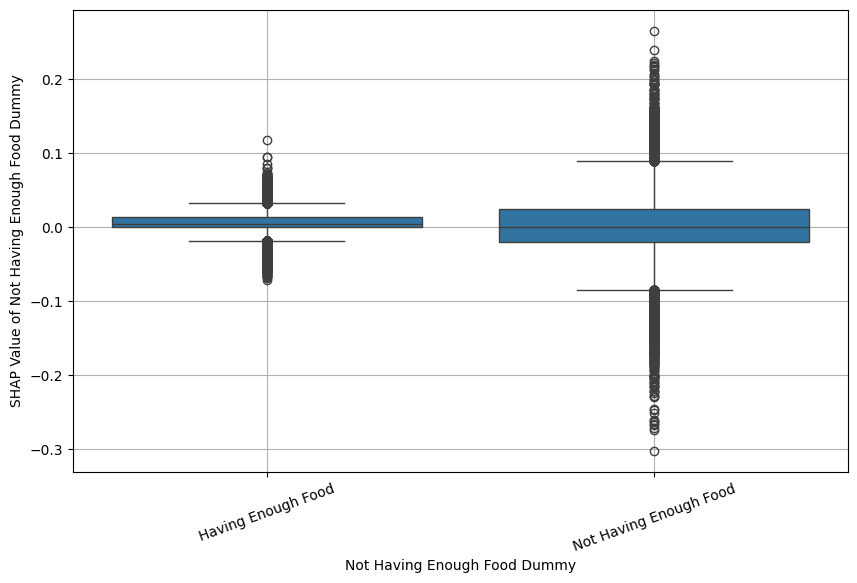

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Enough_food', y='Enough_food_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Not Having Enough Food Dummy')
plt.ylabel('SHAP Value of Not Having Enough Food Dummy')
plt.xticks(ticks=[0, 1], labels=['Having Enough Food', 'Not Having Enough Food'], 
          rotation = 20)

# Show the plot
plt.grid(True)
plt.show()

### Employment

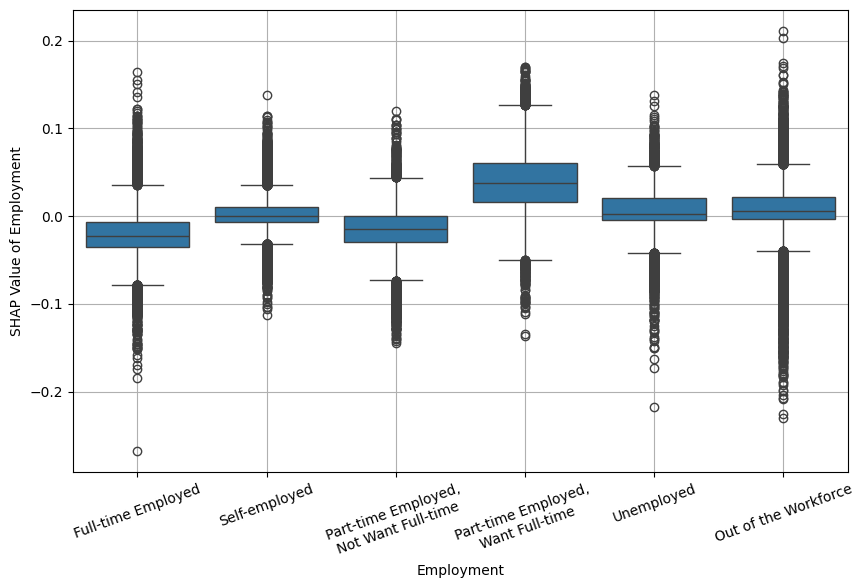

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment', y='Employment_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Employment')
plt.ylabel('SHAP Value of Employment')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time', 
                                             'Part-time Employed,\nWant Full-time', 'Unemployed', 'Out of the Workforce'], 
          rotation = 20)

# Show the plot
plt.grid(True)
plt.show()

### Marital Status

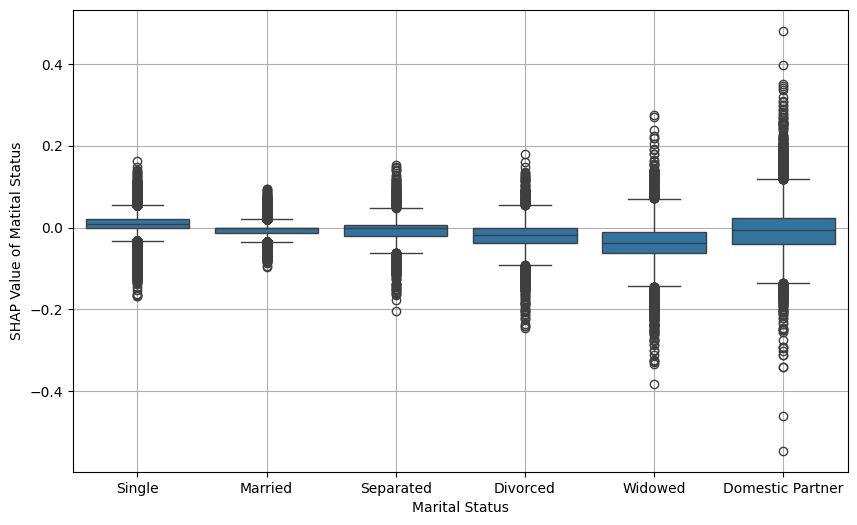

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_status', y='Marital_status_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('SHAP Value of Matital Status')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Separated', 'Divorced', 'Widowed', 'Domestic Partner'])

# Show the plot
plt.grid(True)
plt.show()

### Age and its SHAP Values

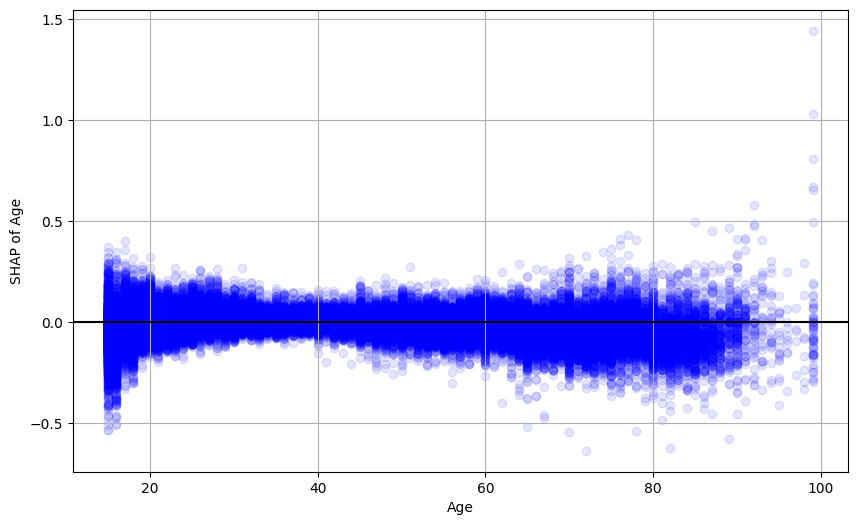

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(Concat_Shap['Age'], Concat_Shap['Age_shap'], alpha=0.1, color='blue')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('SHAP of Age')
plt.grid()

# Show the plot
plt.show()

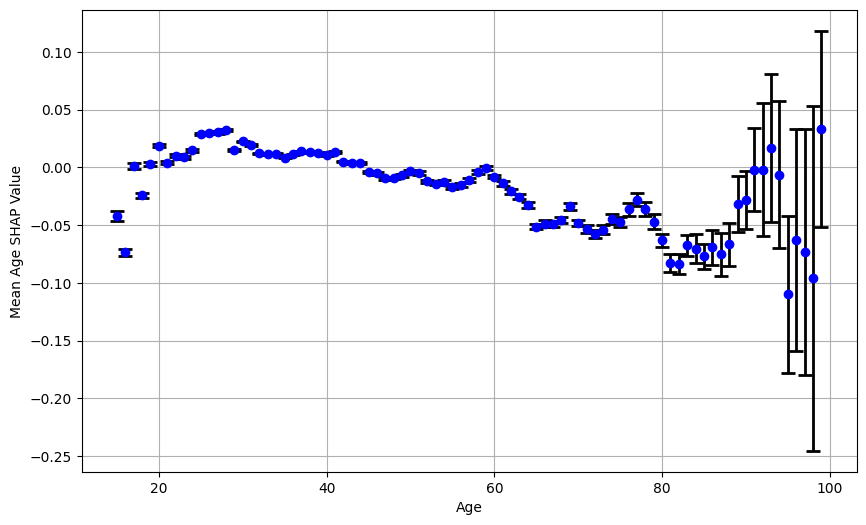

In [42]:
grouped = Concat_Shap.groupby('Age')['Age_shap'].agg(['mean', 'sem'])

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=grouped.index, y=grouped['mean'], yerr=grouped['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Mean Age SHAP Value')

# Optional: Add grid and show plot
plt.grid(True)
plt.show()

### Living Change Direction

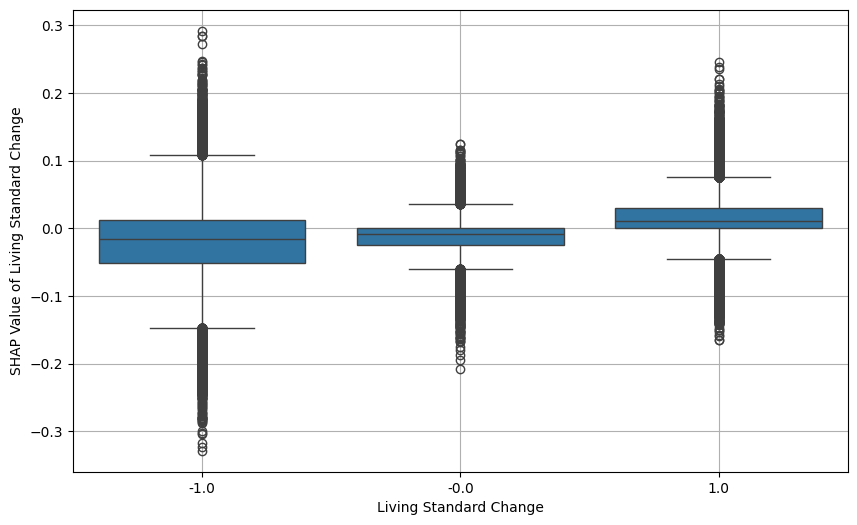

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Living_standard_change', y='Living_standard_change_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Living Standard Change')
plt.ylabel('SHAP Value of Living Standard Change')

# Show the plot
plt.grid(True)
plt.show()

### wave and its SHAP Values

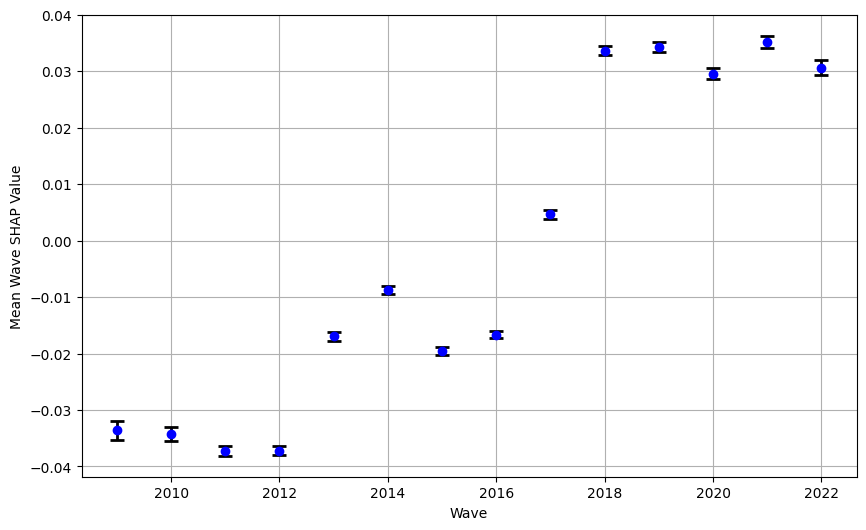

In [34]:
grouped = Concat_Shap.groupby('wave')['wave_shap'].agg(['mean', 'sem'])

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=grouped.index + 2005, y=grouped['mean'], yerr=grouped['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)

# Adding labels and title
plt.xlabel('Wave')
plt.ylabel('Mean Wave SHAP Value')

# Optional: Add grid and show plot
plt.grid(True)
plt.show()

### Children Respected

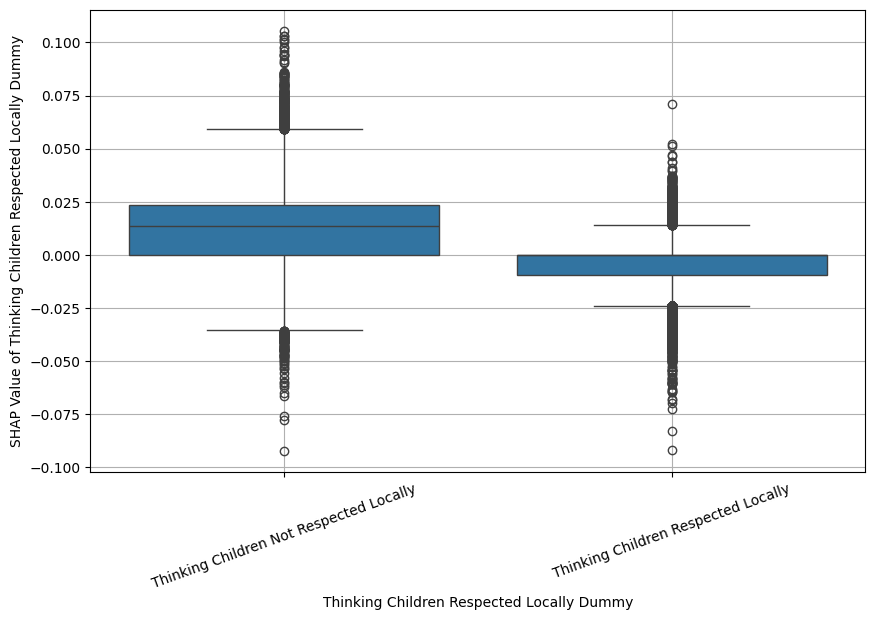

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Children_respected', y='Children_respected_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Thinking Children Respected Locally Dummy')
plt.ylabel('SHAP Value of Thinking Children Respected Locally Dummy')
plt.xticks(ticks=[0, 1], labels=['Thinking Children Not Respected Locally', 'Thinking Children Respected Locally'], 
          rotation = 20)

# Show the plot
plt.grid(True)
plt.show()

### Income Level

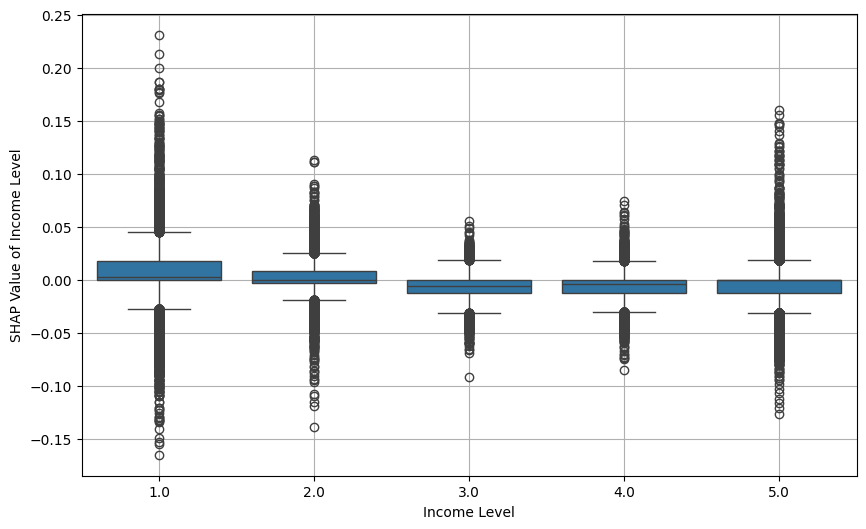

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_level', y='Income_level_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Income Level')
plt.ylabel('SHAP Value of Income Level')

# Show the plot
plt.grid(True)
plt.show()

### Plot 9 Figure Together

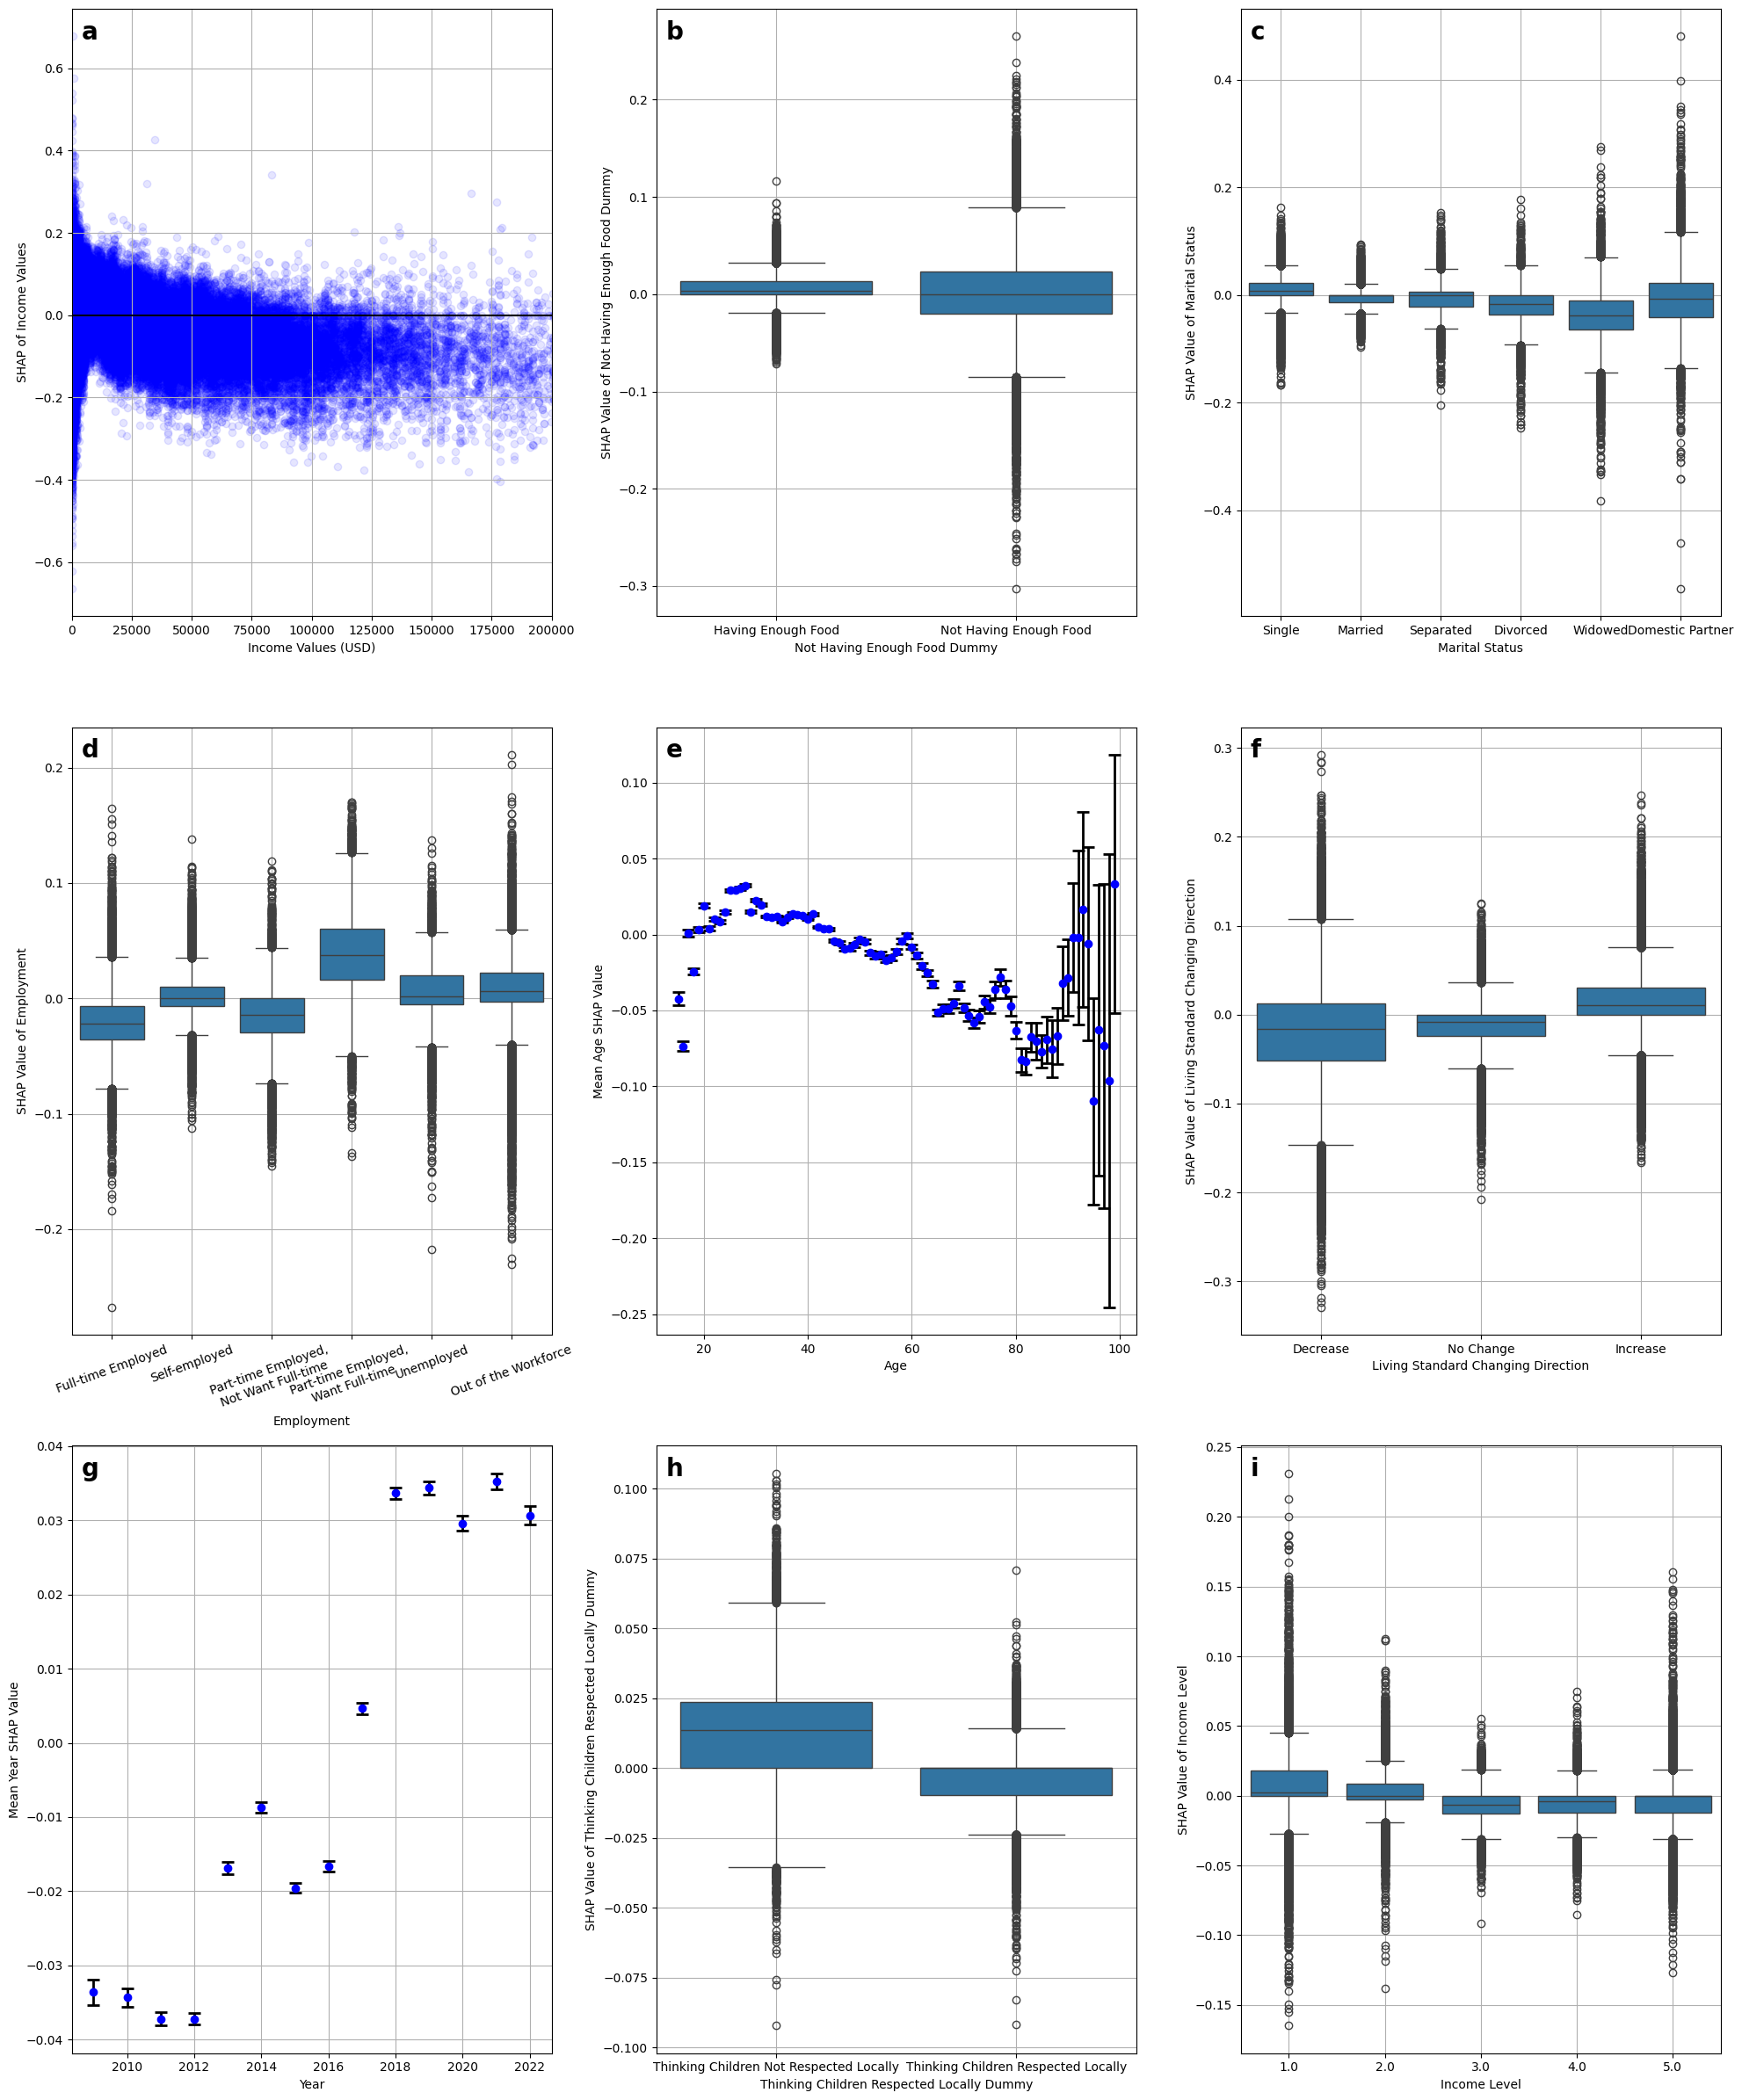

In [39]:
# Create a figure with 8 subplots (2 columns, 4 rows)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 24))

# Plot 1: Scatter plot for Age vs Age_shap
axes[0, 0].scatter(Concat_Shap['INCOME_2'], Concat_Shap['INCOME_2_shap'], alpha=0.1, color='blue')
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1.5)
axes[0, 0].set_xlim([0, 200_000])
axes[0, 0].set_xlabel('Income Values (USD)')
axes[0, 0].set_ylabel('SHAP of Income Values')
axes[0, 0].grid(True)
axes[0, 0].annotate('a', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 2: Box plot
sns.boxplot(x='Enough_food', y='Enough_food_shap', data=Concat_Shap, ax=axes[0, 1])
axes[0, 1].set_xlabel('Not Having Enough Food Dummy')
axes[0, 1].set_ylabel('SHAP Value of Not Having Enough Food Dummy')
axes[0, 1].set_xticks(ticks=[0, 1])
axes[0, 1].set_xticklabels(['Having Enough Food', 'Not Having Enough Food'])
axes[0, 1].grid(True)
axes[0, 1].annotate('b', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 3: Box plot for Marital Status SHAP values
sns.boxplot(x='Marital_status', y='Marital_status_shap', data=Concat_Shap, ax=axes[0, 2])
axes[0, 2].set_xlabel('Marital Status')
axes[0, 2].set_ylabel('SHAP Value of Marital Status')
axes[0, 2].set_xticks(ticks=[0, 1, 2, 3, 4, 5])
axes[0, 2].set_xticklabels(['Single', 'Married', 'Separated', 'Divorced', 'Widowed', 'Domestic Partner'])
axes[0, 2].grid(True)
axes[0, 2].annotate('c', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 4: Box plot for Employment SHAP values
sns.boxplot(x='Employment', y='Employment_shap', data=Concat_Shap, ax=axes[1, 0])
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('SHAP Value of Employment')
axes[1, 0].set_xticks(ticks=[0, 1, 2, 3, 4, 5])
axes[1, 0].set_xticklabels(['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time', 'Part-time Employed,\nWant Full-time', 'Unemployed', 'Out of the Workforce'], rotation=20)
axes[1, 0].grid(True)
axes[1, 0].annotate('d', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 5: Error bar plot for Mean Age SHAP by Age
grouped_age = Concat_Shap.groupby('Age')['Age_shap'].agg(['mean', 'sem'])
axes[1, 1].errorbar(x=grouped_age.index, y=grouped_age['mean'], yerr=grouped_age['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Mean Age SHAP Value')
axes[1, 1].grid(True)
axes[1, 1].annotate('e', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 6: 
sns.boxplot(x='Living_standard_change', y='Living_standard_change_shap', data=Concat_Shap, ax=axes[1, 2])
axes[1, 2].set_xlabel('Living Standard Changing Direction')
axes[1, 2].set_ylabel('SHAP Value of Living Standard Changing Direction')
axes[1, 2].set_xticks(ticks=[0, 1, 2])
axes[1, 2].set_xticklabels(['Decrease', 'No Change', 'Increase'])
axes[1, 2].grid(True)
axes[1, 2].annotate('f', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')


# Plot 7: Error bar plot for Mean Wave SHAP by Wave
grouped_wave = Concat_Shap.groupby('wave')['wave_shap'].agg(['mean', 'sem'])
axes[2, 0].errorbar(x=grouped_wave.index + 2005, y=grouped_wave['mean'], yerr=grouped_wave['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Mean Year SHAP Value')
axes[2, 0].grid(True)
axes[2, 0].annotate('g', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 8: Box plot
sns.boxplot(x='Children_respected', y='Children_respected_shap', data=Concat_Shap, ax=axes[2, 1])
axes[2, 1].set_xlabel('Thinking Children Respected Locally Dummy')
axes[2, 1].set_ylabel('SHAP Value of Thinking Children Respected Locally Dummy')
axes[2, 1].set_xticks(ticks=[0, 1])
axes[2, 1].set_xticklabels(['Thinking Children Not Respected Locally', 'Thinking Children Respected Locally'])
axes[2, 1].grid(True)
axes[2, 1].annotate('h', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 9: Box plot for Income Level SHAP values
sns.boxplot(x='Income_level', y='Income_level_shap', data=Concat_Shap, ax=axes[2, 2])
axes[2, 2].set_xlabel('Income Level')
axes[2, 2].set_ylabel('SHAP Value of Income Level')
axes[2, 2].grid(True)
axes[2, 2].annotate('i', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')



# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Figures/MJ_AbsShapOtherVariablesTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Plot Top 6 Figure Together

C:\Users\Li Chao\AppData\Local\Temp\ipykernel_19948\191798360.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_xticklabels(['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time',


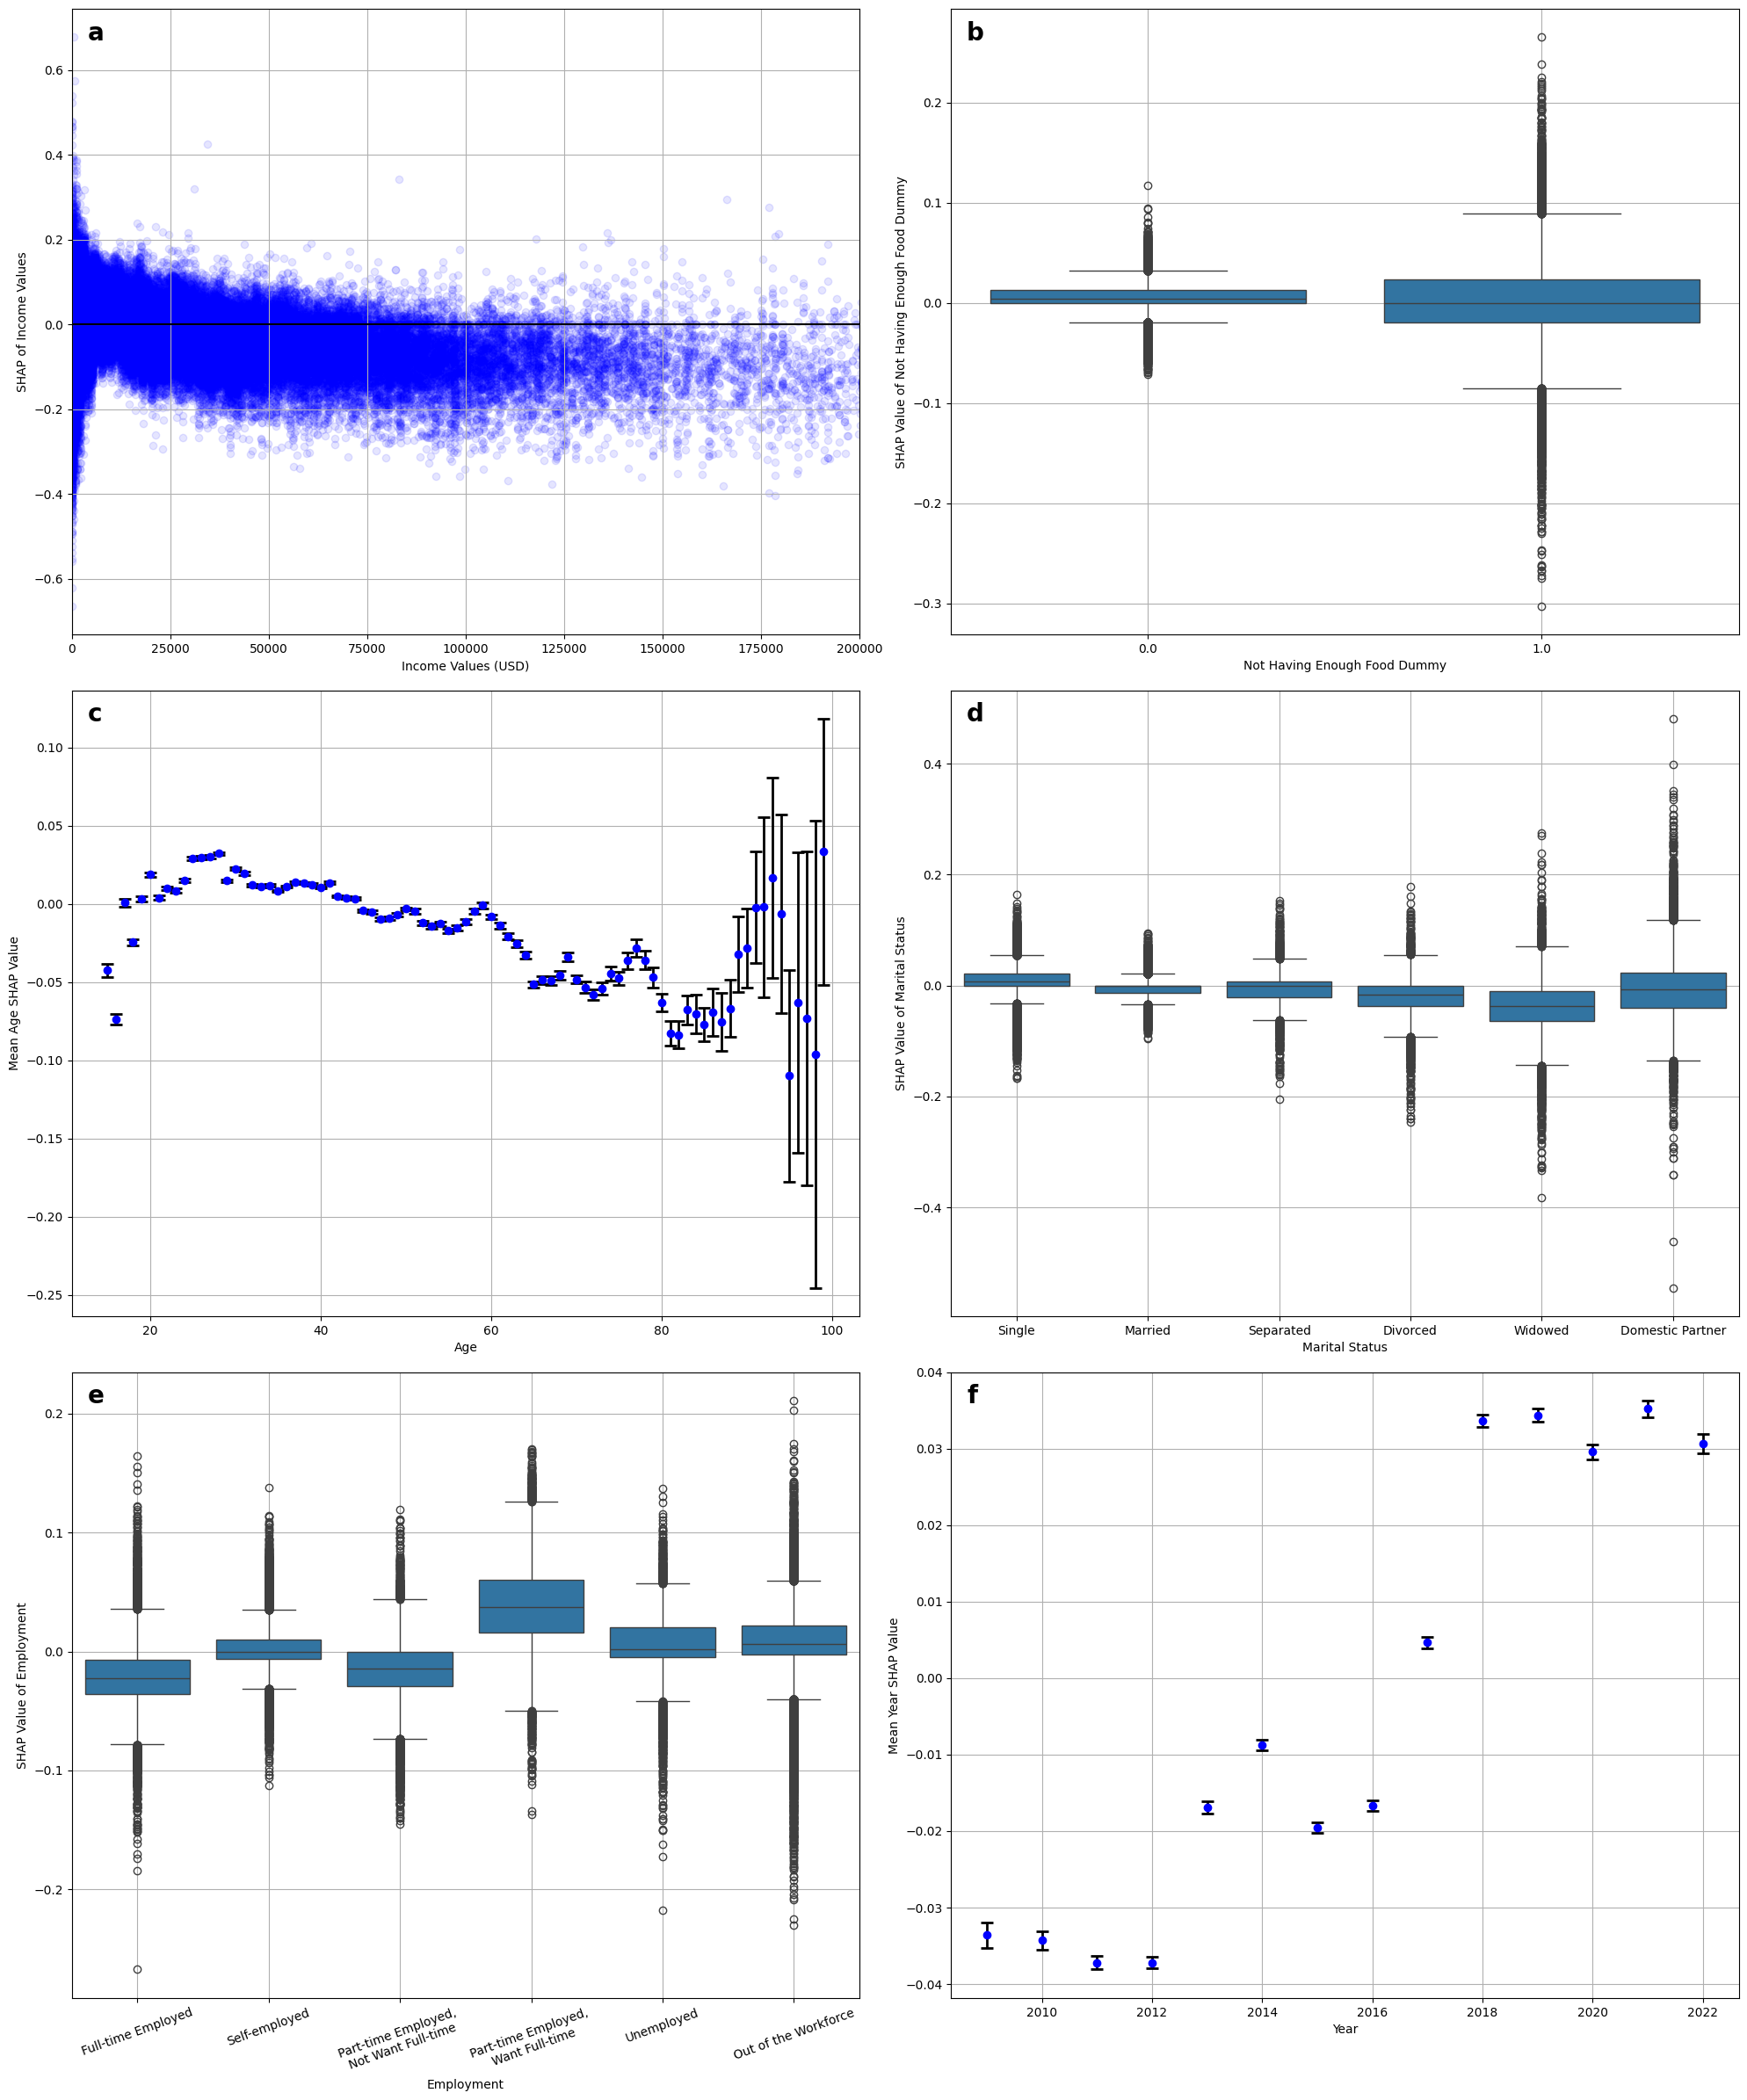

In [50]:
# Create a figure with 8 subplots (2 columns, 4 rows)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 24))

# Plot 1: Scatter plot for Age vs Age_shap
axes[0, 0].scatter(Concat_Shap['INCOME_2'], Concat_Shap['INCOME_2_shap'], alpha=0.1, color='blue')
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1.5)
axes[0, 0].set_xlim([0, 200_000])
axes[0, 0].set_xlabel('Income Values (USD)')
axes[0, 0].set_ylabel('SHAP of Income Values')
axes[0, 0].grid(True)
axes[0, 0].annotate('a', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

#Enough_food_shap
# Plot 2: Box plot
sns.boxplot(x='Enough_food', y='Enough_food_shap', data=Concat_Shap, ax=axes[0, 1])
axes[0, 1].set_xlabel('Not Having Enough Food Dummy')
axes[0, 1].set_ylabel('SHAP Value of Not Having Enough Food Dummy')
axes[0, 1].grid(True)
axes[0, 1].annotate('b', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 3: Error bar plot for Mean Age SHAP by Age
grouped_age = Concat_Shap.groupby('Age')['Age_shap'].agg(['mean', 'sem'])
axes[1, 0].errorbar(x=grouped_age.index, y=grouped_age['mean'], yerr=grouped_age['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Mean Age SHAP Value')
axes[1, 0].grid(True)
axes[1, 0].annotate('c', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 4: Box plot for Marital Status SHAP values
sns.boxplot(x='Marital_status', y='Marital_status_shap', data=Concat_Shap, ax=axes[1, 1])
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('SHAP Value of Marital Status')
axes[1, 1].set_xticks(ticks=[0, 1, 2, 3, 4, 5])
axes[1, 1].set_xticklabels(['Single', 'Married', 'Separated', 'Divorced', 'Widowed', 'Domestic Partner'])
axes[1, 1].grid(True)
axes[1, 1].annotate('d', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 5: Box plot for Income Level SHAP values
sns.boxplot(x='Employment', y='Employment_shap', data=Concat_Shap, ax=axes[2, 0])
axes[2, 0].set_xlabel('Employment')
axes[2, 0].set_ylabel('SHAP Value of Employment')

axes[2, 0].set_xticklabels(['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time', 
                                                             'Part-time Employed,\nWant Full-time', 'Unemployed', 'Out of the Workforce'], 
                           rotation = 20)
axes[2, 0].grid(True)
axes[2, 0].annotate('e', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 6: Error bar plot for Mean Wave SHAP by Wave
grouped_wave = Concat_Shap.groupby('wave')['wave_shap'].agg(['mean', 'sem'])
axes[2, 1].errorbar(x=grouped_wave.index + 2005, y=grouped_wave['mean'], yerr=grouped_wave['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Mean Year SHAP Value')
axes[2, 1].grid(True)
axes[2, 1].annotate('f', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Figures/MJ_AbsShapTop6VariablesTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### SHAP Difference of Binary Variable

In [51]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' not in item]

In [52]:
for item in Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index:
    print(item)

INCOME_2_shap
Enough_food_shap
Marital_status_shap
Enjoyment_shap
Age_shap
Living_standard_change_shap
wave_shap
Children_respected_shap
Income_level_shap
Corruption_business_shap
Conf_military_shap
Voice_official_shap
Freedom_chooselife_shap
Employment_shap
Anger_shap
Sat_oppofriend_shap
Feeling_income_shap
Safety_walk_shap
Stolen_shap
Enough_shelter_shap
Sadness_shap
Good_minorities_shap
Stress_shap
Children_under15_shap
Well_rested_shap
Sat_qualitywater_shap
Conf_government_shap
Sat_perserveenv_shap
Sat_healthcare_shap
Assualted_shap
Corruption_government_shap
Smile_shap
Good_gayles_shap
Health_disable_shap
Local_police_shap
Help_stranger_shap
Conf_honestyelections_shap
City_satisficied_shap
Sat_dealpoor_shap
Sat_road_shap
Sat_qualityair_shap
Good_immigrants_shap
Volunteer_shap
Sat_affhouse_shap
Sat_pubtran_shap
Interesting_thing_shap
Goodtime_job_shap
Children_learn_shap
Physical_pain_shap
Relative_have_shap
Donated_shap
Economic_change_shap
Conf_financial_shap
Conf_judicial_shap
W

In [53]:
columns_of_interest = ["Wave", "Household Income", "Health Disability Dummy", "Having Relatives to Rely on Dummy",
                       "Living Standard Changing Direction", "Having Enough Food Dummy", "Having Enough Shelter Dummy", 
                       "Feeling Well Rested Dummy", "Feeling Respected Dummy", "Smiling Dummy",
                       "Doing Interesting Things Dummy", "Having Enjoyment Dummy", "Suffering Physical Pain Dummy",
                       "Feeling Worry Dummy", "Feeling Sad Dummy", "Feeling Stress Dummy", "Feeling Anger Dummy",
                       "Feeling Satisfied with City Dummy", "Economic Changing Direction", "Thinking Good Time to Find Job Dummy",
                       "Feeling Satisfied with Public Transportation Dummy", "Feeling Satisfied with Road Dummy", "Feeling Satisfied with Education Dummy",
                       "Feeling Satisfied with Air Quality Dummy", "Feeling Satisfied with Water Quality Dummy", "Feeling Satisfied with Healthcare Dummy", 
                       "Feeling Satisfied with Affordable House Dummy", "Feeling Satisfied with Opportunity to Make Friends Dummy",
                       "Thinking Good Place for Ethitical Minority Dummy", "Thinking Good Place for Gay or Lesbian Dummy", "Thinking Good Place for Immigrants Dummy",
                       "Donated Recently Dummy", "Did Volunteer Recently Dummy", "Helped Stranger Dummy",
                       "Voiced Opinion to Official Dummy", "Feeling Confident in Local Police Dummy", "Feeling Safe of Alone Night Walking Dummy",
                       "Having Been Stolen Dummy", "Having Been Assaulted Dummy", "Thinking Religion Importance Locally Dummy",
                       "Thinking Children Respected Locally Dummy", "Having Opportunity for Children Learning Locally Dummy", "Feeling Women Respected Dummy",
                       "Feeling Satisfied with Poverty Alleviation Dummy", "Feeling Satisfied with Environmental Efforts Dummy", "Feeling Freedom of Choosing Life Dummy",
                       "Feeling Confidence in Military Dummy", "Feeling Confidence in Judicial System Dummy", "Feeling Confidence in National Government Dummy",
                       "Feeling Confidence in Financial System Dummy", "Feeling Confidence in Election Honesty Dummy", "Feeling Freedom of Media Dummy",
                       "Prevailing Corruption within Business Dummy", "Prevailing Corruption within Government Dummy", "Approving of Leadership Performance Dummy",
                       "Age", "Marital Status", "Employment", 
                       "Children Under 15 Dummy", "Feeling of Income", "Income Level"]

In [54]:
non_binary_colnames = ['INCOME_2_shap', 'Age_shap', 'Marital_status_shap', 'wave_shap',
                      'Income_level_shap', 'Feeling_income_shap', 'Employment_shap', 'Economic_change_shap',
                      'Living_standard_change_shap']

In [55]:
binary_colnames = []
beautifual_binary_colnames = []
for i, item in enumerate(shap_colnames):
    if item not in non_binary_colnames:
        binary_colnames.append(item)
        beautifual_binary_colnames.append(columns_of_interest[i])

In [56]:
Concat_Shap['Health_disable'] = abs(Concat_Shap['Health_disable'] - 2)

In [57]:
Concat_Shap['Health_disable'].describe()

count    191122.000000
mean          0.246764
std           0.431129
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Health_disable, dtype: float64

In [58]:
def star(p):
    if p < 0.001:
        out = '***'
    elif p < 0.01:
        out = '**'
    elif p < 0.05:
        out = '*'
    else:
        out = ''
    return out

In [59]:
binary_df = []
for item, beautiful_item in zip(binary_colnames, beautifual_binary_colnames):
    group_1 = Concat_Shap[Concat_Shap[item.replace('_shap', '')] == 1][item]
    group_0 = Concat_Shap[Concat_Shap[item.replace('_shap', '')] == 0][item]

    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    diff = (np.mean(group_1) - np.mean(group_0)) * 1_000
    
    line = [beautiful_item, f"{diff:.3f}{star(p_value)}"]
    print(line)
    binary_df.append(line)

['Health Disability Dummy', '-12.927***']
['Having Relatives to Rely on Dummy', '20.130***']
['Having Enough Food Dummy', '-3.219***']
['Having Enough Shelter Dummy', '1.201***']
['Feeling Well Rested Dummy', '-11.332***']
['Feeling Respected Dummy', '-7.165***']
['Smiling Dummy', '-0.014']
['Doing Interesting Things Dummy', '-0.959***']
['Having Enjoyment Dummy', '-4.583***']
['Suffering Physical Pain Dummy', '0.444***']
['Feeling Worry Dummy', '-13.499***']
['Feeling Sad Dummy', '18.135***']
['Feeling Stress Dummy', '-4.096***']
['Feeling Anger Dummy', '7.873***']
['Feeling Satisfied with City Dummy', '8.717***']
['Thinking Good Time to Find Job Dummy', '-1.389***']
['Feeling Satisfied with Public Transportation Dummy', '-2.592***']
['Feeling Satisfied with Road Dummy', '2.267***']
['Feeling Satisfied with Education Dummy', '1.055***']
['Feeling Satisfied with Air Quality Dummy', '-3.439***']
['Feeling Satisfied with Water Quality Dummy', '4.710***']
['Feeling Satisfied with Healthca

### Visual the Top 10 Country

In [8]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' in item]

In [10]:
Concat_Shap[shap_colnames].mean(axis=1).abs().sort_values(ascending=False).head(20)

620631     0.006737
1867957    0.006563
2198618    0.006364
1868706    0.006229
1831385    0.006019
2456325    0.005981
2509242    0.005935
2199400    0.005794
620847     0.005790
2024446    0.005777
2024361    0.005680
2198611    0.005672
1179510    0.005670
2098963    0.005661
2536964    0.005572
1775666    0.005517
1755837    0.005511
1867982    0.005472
1512248    0.005452
2199323    0.005440
dtype: float32

In [12]:
Concat_Shap['coun_mean'] =  Concat_Shap[shap_colnames].mean(axis=1)

In [69]:
country_colnames = [item for item in colnames if 'Country_' in item if '_shap' not in item]

In [118]:
mean_value_list = {}
for country_colname in country_colnames:
    mean_value = Concat_Shap[Concat_Shap[country_colname]==1].loc[:, 'coun_mean'].mean()
    std_err = Concat_Shap[Concat_Shap[country_colname]==1].loc[:, 'coun_mean'].sem()
    mean_value_list[country_colname.replace('Country_', '')] = [mean_value, std_err]

In [119]:
df = pd.DataFrame.from_dict(mean_value_list, orient='index', columns=[ 'Mean', 'Stderr'])

In [120]:
df = df.sort_values(by='Mean', ascending=True) 

In [121]:
df.head()

,Mean,Stderr
TGO,-0.002109,0.000033
SLE,-0.002045,0.000048
SSD,-0.001867,0.000054
TCD,-0.001787,0.000020
COG,-0.001561,0.000035


In [122]:
df.shape

(164, 2)

In [123]:
int(df.shape[0] / 2)

82

In [124]:
int(df.shape[0] / 2)

82

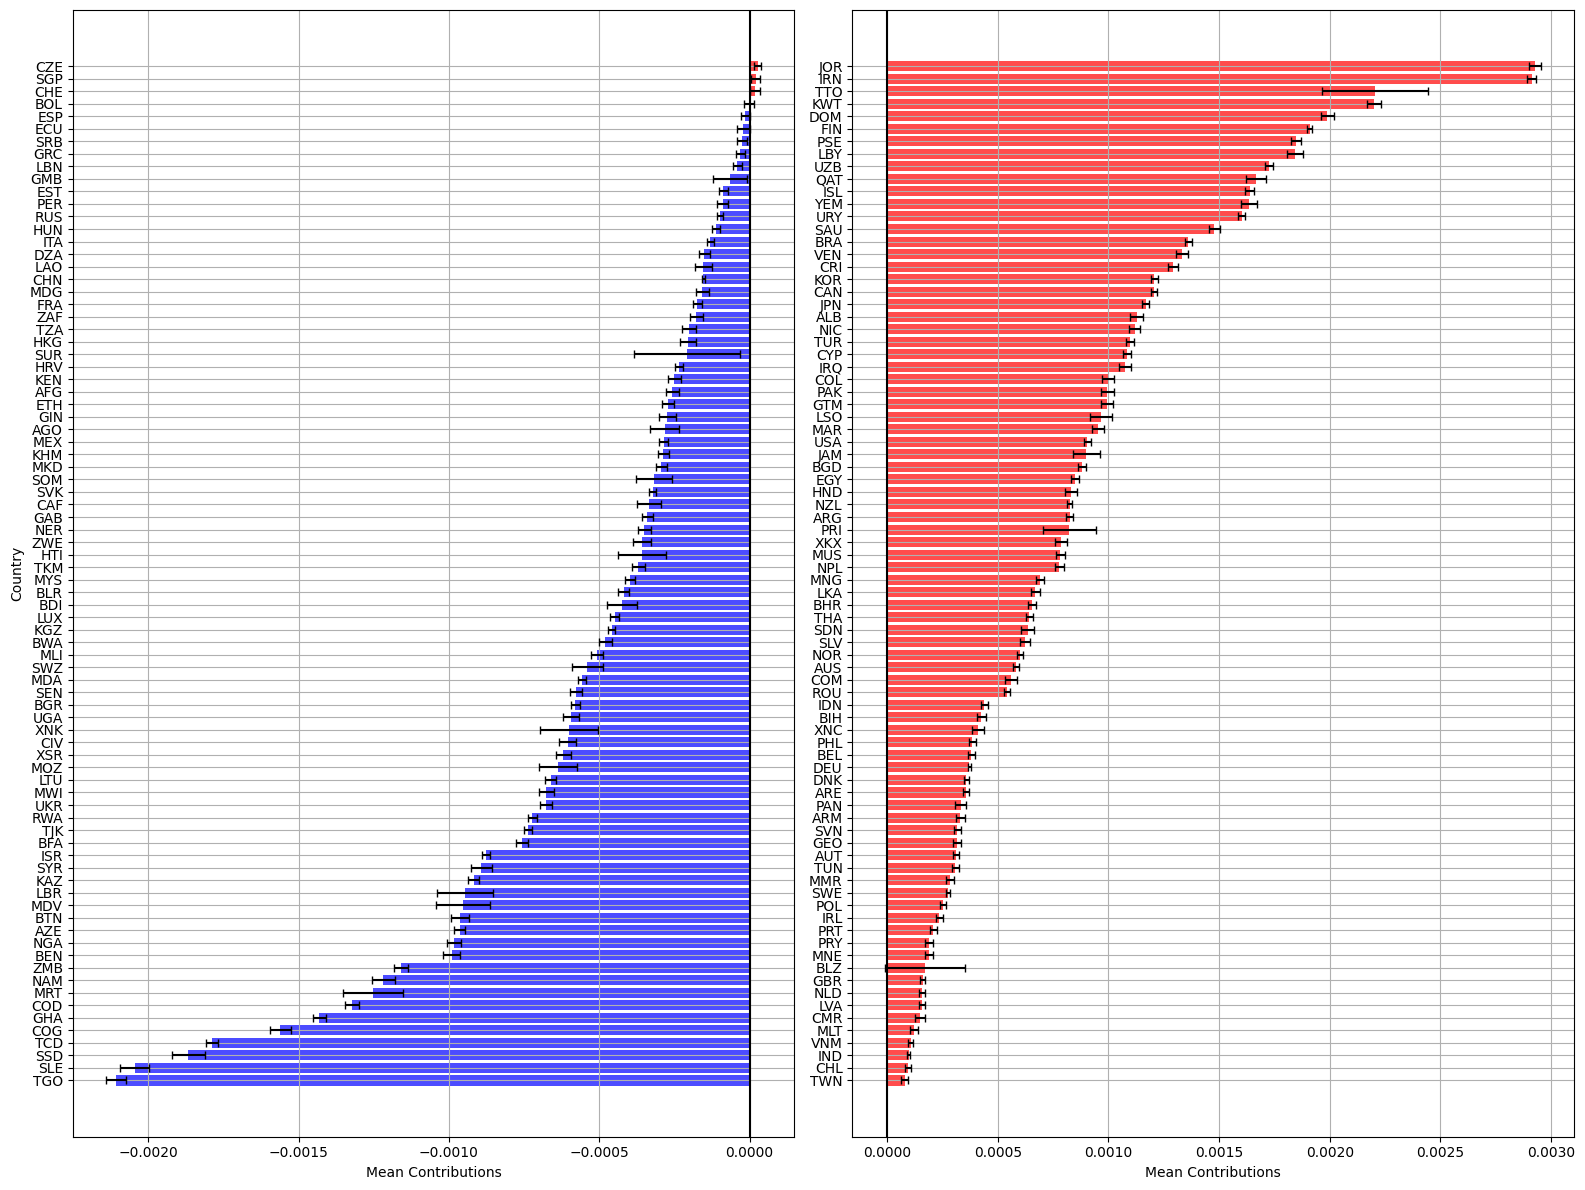

In [126]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))  # Adjust the figure size as needed

# First panel (left side, top half of the data)
df0 = df.iloc[:int(df.shape[0] / 2), :]
colors0 = ['red' if value > 0 else 'blue' for value in df0.Mean]

ax1.barh(y=df0.index, width=df0.Mean, xerr=df0.Stderr, capsize=3, color=colors0, alpha=0.7)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax1.set_xlabel('Mean Contributions')
ax1.set_ylabel('Country')
ax1.grid(True)

# Second panel (right side, bottom half of the data)
df1 = df.iloc[int(df.shape[0] / 2):, :]
colors1 = ['red' if value > 0 else 'blue' for value in df1.Mean]

ax2.barh(y=df1.index, width=df1.Mean, xerr=df1.Stderr, capsize=3, color=colors1, alpha=0.7)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax2.set_xlabel('Mean Contributions')
ax2.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the combined figure
plt.savefig('Figures/MJ_AbsShapCountryTreatmentEffectGender_TwoPanels.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Mapping 

In [146]:
country_gdf = gpd.read_file('Data/globalShp/World_Countries_Generalized_1984.shp')

In [147]:
country_gdf.head()

,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,Country_na,Official_s,Sovereignt,Alpha_3_co,Numeric_co,Subdivisio,Internet_c,Shape_Leng,Shape_Area,geometry
0,American Samoa,AS,United States,US,American Samoa,The Territory of American Samoa,United States,ASM,16,ISO 3166-2:AS,.as,0.600124,0.013720,"POLYGON ((-170.7439 -14.37555, -170.74942 -14...."
1,United States Minor Outlying Islands,UM,United States,US,United States Minor Outlying Islands (The),"Baker Island, Howland Island, Jarvis Island, J...",United States,UMI,581,ISO 3166-2:UM,[ad],0.480216,0.003216,"MULTIPOLYGON (((166.65878 19.28285, 166.64276 ..."
2,Cook Islands,CK,New Zealand,NZ,Cook Islands (The),The Cook Islands,New Zealand,COK,184,ISO 3166-2:CK,.ck,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,French Polynesia,PF,France,FR,French Polynesia,French Polynesia,France,PYF,258,ISO 3166-2:PF,.pf,3.930211,0.175332,"MULTIPOLYGON (((-149.1792 -17.87084, -149.2580..."
4,Niue,NU,New Zealand,NZ,Niue,Niue,New Zealand,NIU,570,ISO 3166-2:NU,.nu,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."


In [148]:
country_gdf = country_gdf[['COUNTRY', 'Alpha_3_co', 'geometry']]

In [149]:
country_gdf = country_gdf.set_index('Alpha_3_co')

In [150]:
country_gdf = country_gdf.groupby(country_gdf.index).geometry.apply(unary_union)

In [151]:
country_gdf.shape

(244,)

In [152]:
country_gdf = gpd.GeoDataFrame(country_gdf)

In [153]:
country_gdf = country_gdf.merge(df, left_index = True, right_index = True, how = 'left')

In [154]:
country_gdf.head()

,geometry,Mean,Stderr
Alpha_3_co,,,
ABW,"POLYGON ((-69.88224 12.41111, -69.94695 12.436...",NaN,NaN
AFG,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",-0.000257,0.000022
AGO,"MULTIPOLYGON (((23.28916 -17.66111, 23.28472 -...",-0.000283,0.000047
AIA,"POLYGON ((-63.16778 18.16445, -63.15695 18.177...",NaN,NaN
ALB,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",0.001128,0.000029


In [156]:
country_gdf = country_gdf.set_crs('4326')

In [157]:
country_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [158]:
country_gdf.Mean.describe()

count    158.000000
mean       0.000156
std        0.000908
min       -0.002109
25%       -0.000366
50%        0.000060
75%        0.000756
max        0.002929
Name: Mean, dtype: float64

In [168]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","green", 'white',"yellow","red"])

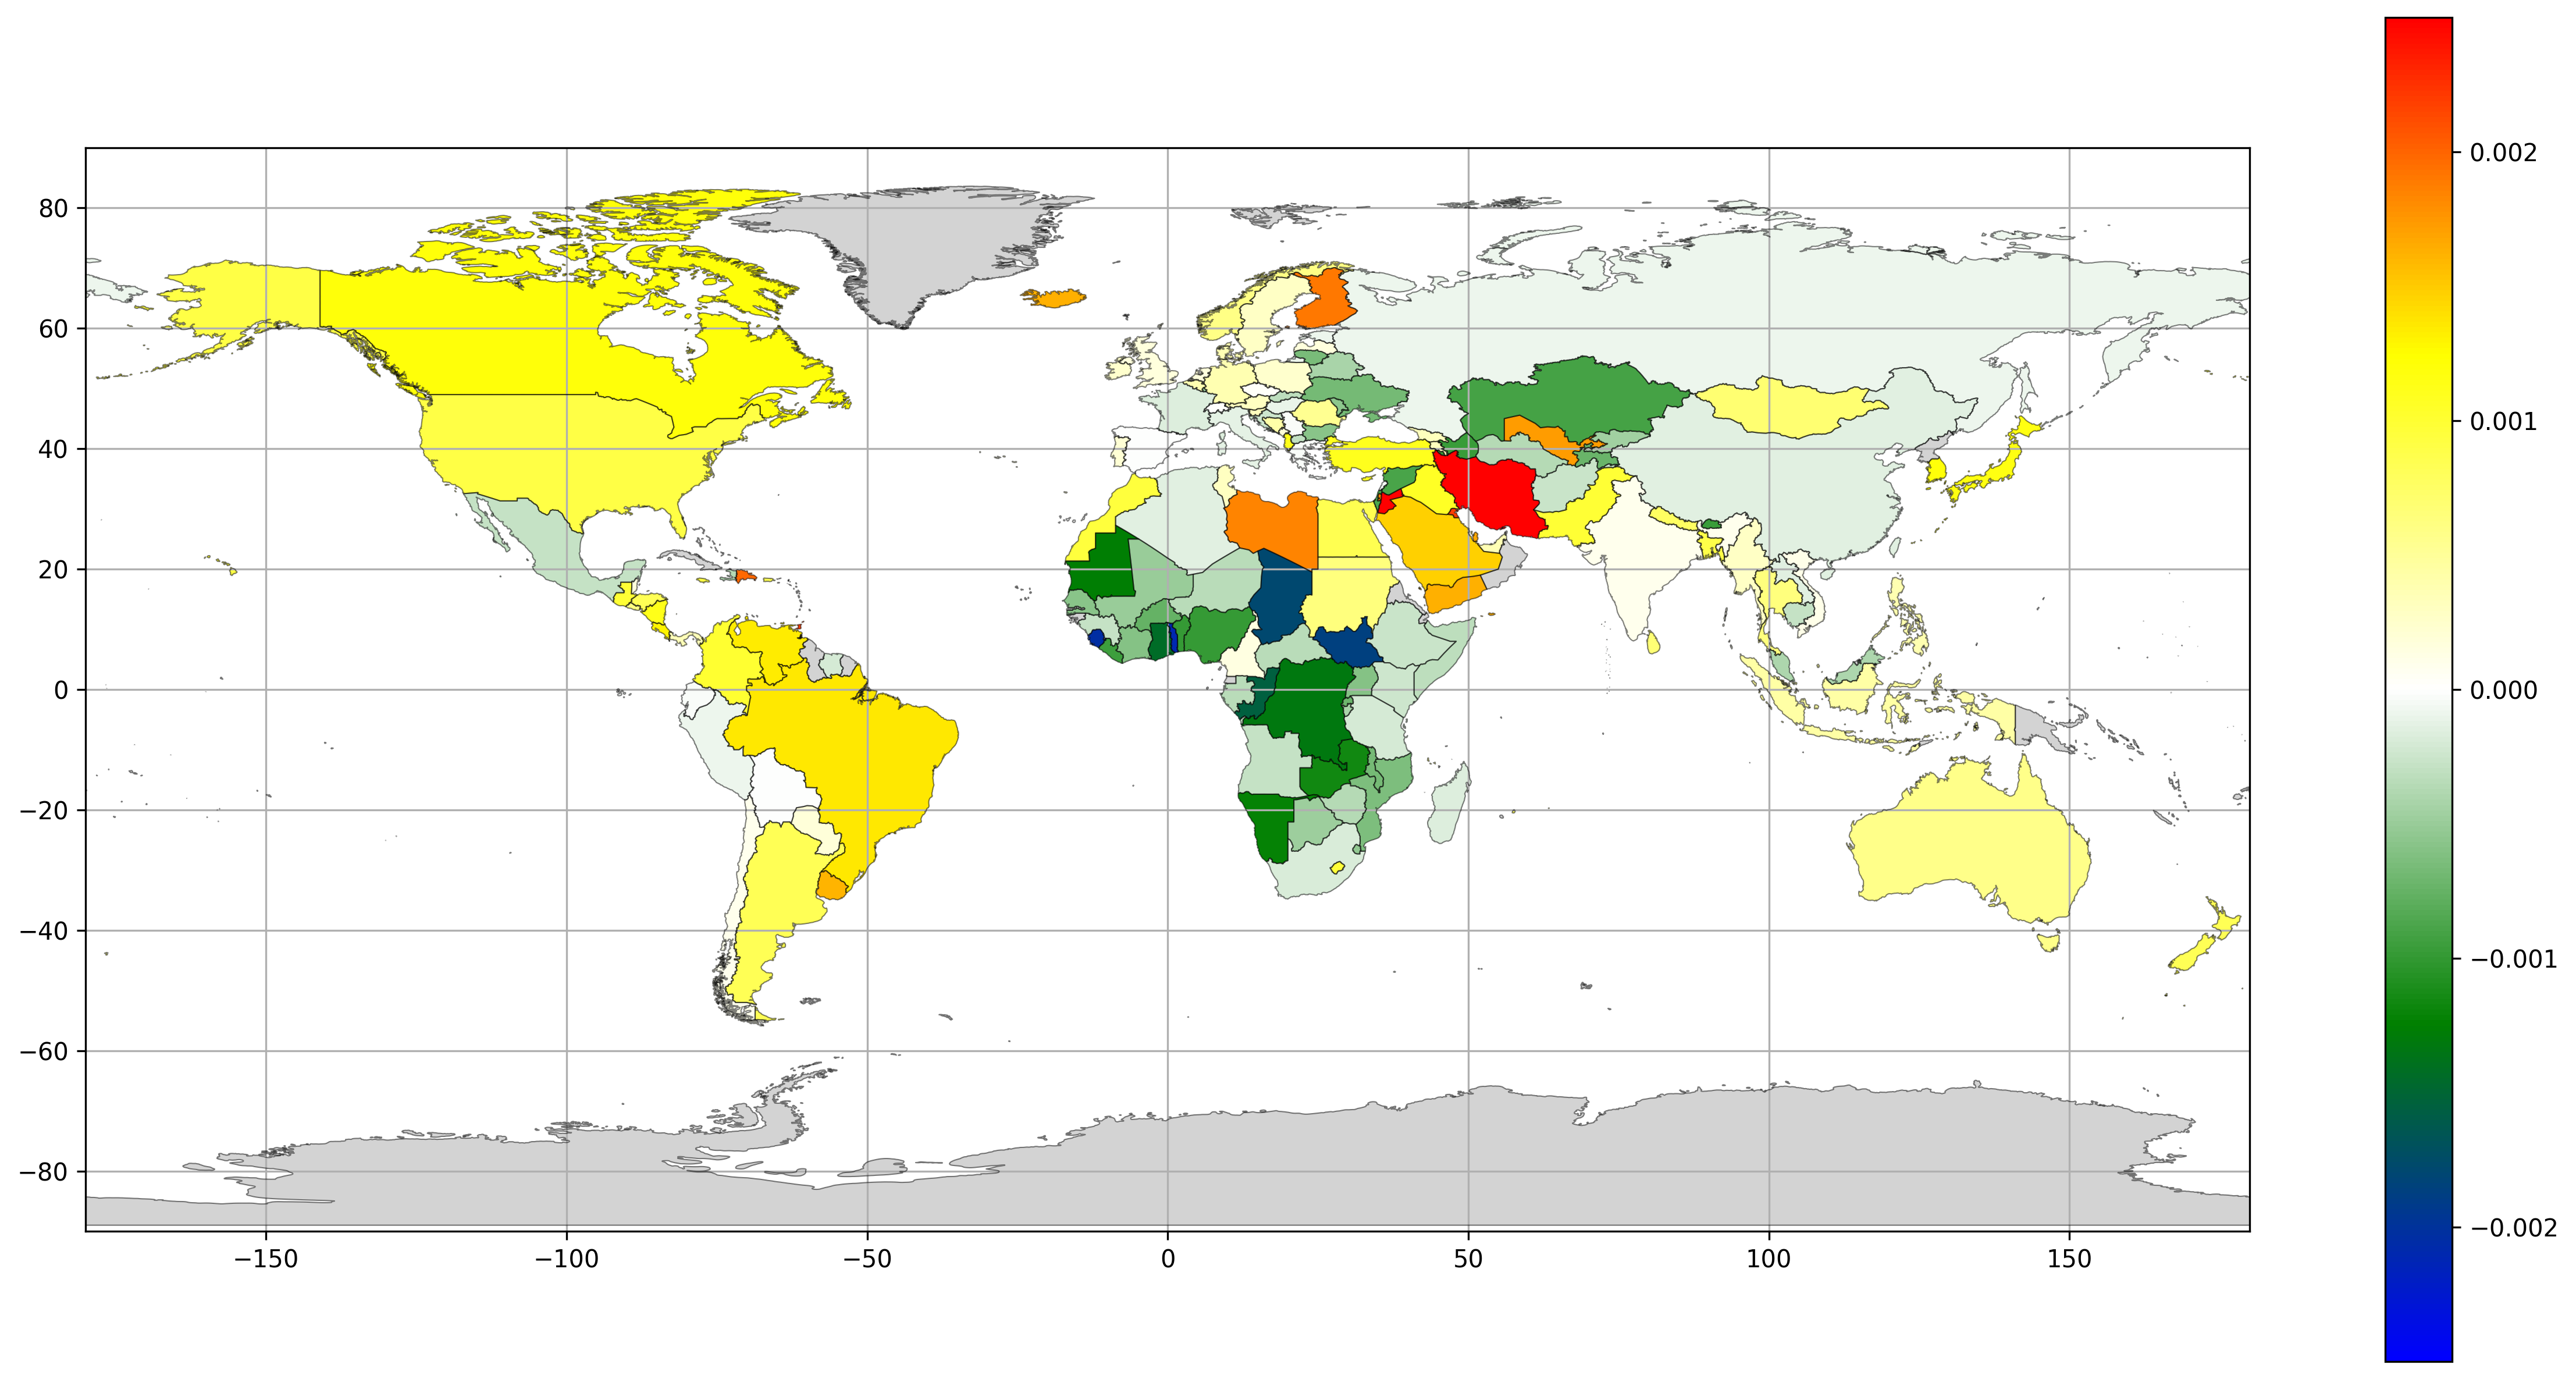

In [205]:
fig = plt.figure(figsize = (20, 10), dpi = 300)
ax = plt.axes()
country_gdf.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.5, linewidth=0.5)
country_gdf.plot(column = 'Mean', ax = ax, legend = True, vmax = 0.0025, vmin = -0.0025, cmap = cmap, missing_kwds={'color': '#D3D3D3', 'label': 'No Data'})
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
fig.savefig('Figures/MJ_AbsShapCountryTreatmentEffectGender_Mapping.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Country-level 

In [171]:
country_iso3_df = pd.read_csv('Data/GII/countrycode.csv')

In [172]:
country_iso3_df.head()

,Country Name,ISO2,ISO3,Top Level Domain,FIPS,ISO Numeric,GeoNameID,E164,Phone Code,Continent,...,Time Zone in Capital,Currency,Language Codes,Languages,Area KM2,Internet Hosts,Internet Users,Phones (Mobile),Phones (Landline),GDP
0,Afghanistan,AF,AFG,af,AF,4,1149361.0,93,93,Asia,...,Asia/Kabul,Afghani,"fa-AF,ps,uz-AF,tk","Afghan Persian or Dari (official) 50%, Pashto ...",647500,223.0,1000000.0,18000000.0,13500.0,2.065000e+10
1,Albania,AL,ALB,al,AL,8,783754.0,355,355,Europe,...,Europe/Tirane,Lek,"sq,el",Albanian 98.8% (official - derived from Tosk d...,28748,15528.0,1300000.0,3500000.0,312000.0,1.280000e+10
2,Algeria,DZ,DZA,dz,AG,12,2589581.0,213,213,Africa,...,Africa/Algiers,Dinar,ar-DZ,"Arabic (official), French (lingua franca), Ber...",2381740,676.0,4700000.0,37692000.0,3200000.0,2.157000e+11
3,American Samoa,AS,ASM,as,AQ,16,5880801.0,1,1-684,Oceania,...,Pacific/Pago_Pago,Dollar,"en-AS,sm,to",Samoan 90.6% (closely related to Hawaiian and ...,199,2387.0,NaN,NaN,10000.0,4.622000e+08
4,Andorra,AD,AND,ad,AN,20,3041565.0,376,376,Europe,...,Europe/Andorra,Euro,ca,"Catalan (official), French, Castilian, Portuguese",468,28383.0,67100.0,65000.0,39000.0,4.800000e+09


In [173]:
country_iso3_df = country_iso3_df[['Country Name', 'ISO3']]

In [179]:
country_iso3_df.columns = ['Country', 'ISO3']

In [177]:
GII = pd.read_excel('Data/GII/HDR23-24_Statistical_Annex_GII_Table.xlsx')

In [178]:
GII.head()

,HDI rank,Country,Gender Inequality Index
0,1,Switzerland,0.018
1,2,Norway,0.012
2,3,Iceland,0.039
3,4,Hong Kong,..
4,5,Denmark,0.009


In [180]:
GII.columns = ['HDI', 'Country', 'GII']

In [181]:
GII = GII.merge(country_iso3_df, on = 'Country', how ='left')

In [182]:
GII.head()

,HDI,Country,GII,ISO3
0,1,Switzerland,0.018,CHE
1,2,Norway,0.012,NOR
2,3,Iceland,0.039,ISL
3,4,Hong Kong,..,HKG
4,5,Denmark,0.009,DNK


In [185]:
GII['GII'] = GII['GII'].replace('..', np.nan)

/tmp/ipykernel_28324/79039710.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  GII['GII'] = GII['GII'].replace('..', np.nan)


In [186]:
GII['GII'] = GII['GII'].astype('float')

In [188]:
GII = GII.set_index('ISO3')

In [187]:
GII.head()

,HDI,Country,GII,ISO3
0,1,Switzerland,0.018,CHE
1,2,Norway,0.012,NOR
2,3,Iceland,0.039,ISL
3,4,Hong Kong,NaN,HKG
4,5,Denmark,0.009,DNK


In [189]:
GII = GII.merge(df, how = 'left', left_index = True, right_index=True)

In [191]:
GII.head()

,HDI,Country,GII,Mean,Stderr
ISO3,,,,,
CHE,1,Switzerland,0.018,0.000018,0.000017
NOR,2,Norway,0.012,0.000600,0.000014
ISL,3,Iceland,0.039,0.001638,0.000022
HKG,4,Hong Kong,NaN,-0.000205,0.000026
DNK,5,Denmark,0.009,0.000358,0.000012


In [193]:
GII.dropna().shape

(144, 5)

In [196]:
n = 144
r = GII['GII'].corr(GII['Mean'], method='pearson')
print(f"Correlation between Column1 and Column2: {r}")
# Compute t-value
t_value = (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2)
print(f"T-value: {t_value}")
# Compute the p-value using scipy.stats
p_value = stats.t.sf(np.abs(t_value), df=n-2)*2  # two-tailed p-value
print(f"P-value: {p_value}")

Correlation between Column1 and Column2: -0.2580889791388591
T-value: -3.1833327830190665
P-value: 0.0017891860216788116


In [198]:
HDI = pd.read_excel('Data/GII/HDR23-24_Statistical_Annex_HDI_Table.xlsx')

In [199]:
HDI.head()

,HDI rank,Country,Human Development Index (HDI)
0,1.0,Switzerland,0.967
1,2.0,Norway,0.966
2,3.0,Iceland,0.959
3,4.0,"Hong Kong, China (SAR)",0.956
4,5.0,Denmark,0.952


In [200]:
HDI.columns = ['HDI', 'Country', 'HDIindex']

In [201]:
HDI = HDI[['HDI', 'HDIindex']]

In [202]:
GII = GII.merge(HDI, on = 'HDI')

In [204]:
n = 144
r = GII['HDIindex'].corr(GII['GII'], method='pearson')
print(f"Correlation between Column1 and Column2: {r}")
# Compute t-value
t_value = (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2)
print(f"T-value: {t_value}")
# Compute the p-value using scipy.stats
p_value = stats.t.sf(np.abs(t_value), df=n-2)*2  # two-tailed p-value
print(f"P-value: {p_value}")

Correlation between Column1 and Column2: -0.9241138587783269
T-value: -28.81861046808506
P-value: 3.39399735842299e-61


In [203]:
n = 144
r = GII['HDIindex'].corr(GII['Mean'], method='pearson')
print(f"Correlation between Column1 and Column2: {r}")
# Compute t-value
t_value = (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2)
print(f"T-value: {t_value}")
# Compute the p-value using scipy.stats
p_value = stats.t.sf(np.abs(t_value), df=n-2)*2  # two-tailed p-value
print(f"P-value: {p_value}")

Correlation between Column1 and Column2: 0.40778669502533965
T-value: 5.321936835101981
P-value: 3.9143748314195895e-07
